<a href="https://colab.research.google.com/github/CyrusTheVirus001/CryptoForecasting_DeepLearning_UCD_Project/blob/main/CLAIR_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLAIR** <p>
(Crypto Currency Leveraging Artificial Intelligent Recurrent Neural Networks) <p>
**CRYPTO CURRENCY FORECASTING 3-CATEGORICAL MODELS**

In [ ]:
#SHELDON SLATER
#810865586
#CSCI 4931 DEEP LEARNING
#SEMESTER PROJECT

#DATA CAN BE DOWNLOADED FROM HERE:
# https://drive.google.com/drive/folders/1Mo8_IgXVWlBgQ-d18040tiiwaecg7Ast?usp=sharing 

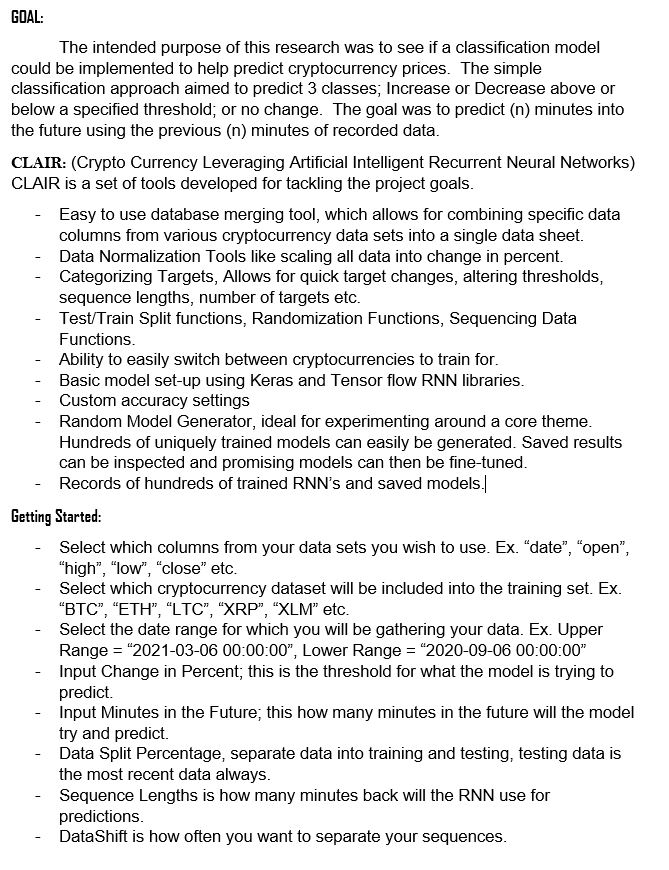

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, reading csv files
import matplotlib.pyplot as plt #Plotting and visualization
import seaborn as sns #Some shiny visualizations
import plotly.express as ex #Still more plotting tools
import random
from scipy import stats #Some statistical tools
from sklearn.model_selection import train_test_split #Train-test splitting library
from sklearn.model_selection import KFold #k-fold cross validation
from sklearn.model_selection import cross_val_score #Or, this one-shot method!
#More on this https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from keras.models import Model, load_model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%load_ext tensorboard
import datetime
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor classification algorithm
from sklearn.svm import SVC #Support Vector Machines classifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report #Computing the confusion matrix and more

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Library Functions:**

In [3]:
def StackData_csv(filePath,fileNames,Columns,AxisMerge,AxisRange,RangeUpper,RangeLower):

  ###This function combines data sets given a file path, array of filenames, and uses .csv ###
  ###Selects Specific Columns and renames columns to a unique name based on their file     ###
  ###Trims data sets into equal ranges and merges them into a single dataframe             ###  

  count = 0
  for files in fileNames:
    stringname = filePath+files+".csv"
    dataFrame = pd.read_csv(stringname,usecols=Columns)
    dataFrame = dataFrame.loc[(dataFrame[AxisRange] <= RangeUpper) & (dataFrame[AxisRange] >= RangeLower)]
    for columnname in Columns:
      if columnname != AxisMerge:
        dataFrame = dataFrame.rename(columns={columnname:columnname+'_'+files})
    if count == 0:
      horizontalstack = dataFrame
      count=1
    else:
      horizontalstack = pd.merge(horizontalstack,dataFrame,on=AxisMerge)

  return horizontalstack

def calculate_target(row,amount,currency_close):
  #This Function is the Mathematical Function to determine y-Targets
  #Used specifically for df.apply() for row operations
  #Calculates Change in Percent and Compares with a Percent Value Threshold 'amount'
  #if currency has predicted increase greater than Percent Value Threshold we return Target value of 1
  #if currency has a predicted decrease greater than Percent Value Threshold we return Target value of -1
  #if currency has a predicted change less than Percent Value Threhold we return Target value of 0

  rFuture = row['Future']
  rClose = row[currency_close]
  Change_in_Perecent = ((rFuture-rClose)/rClose)*100
  
  if Change_in_Perecent > amount:
    return 1
  if abs(Change_in_Perecent) > amount: 
    return 2
  
  return 3

def Create_Targets(DataFrame,Currency,Min_In_Future,Threshold):
  #This function creates a Futures column by shifting the close columns x min into the future
  #function also creates the Target Y column
  stringname = "close_"+Currency
  DataFrame['Future'] = DataFrame[stringname].shift(Min_In_Future)
  DataFrame['Target'] = DataFrame.apply(calculate_target,args=(Threshold,stringname),axis=1)
  #Trims Data that becomes NA from future predictions
  DataFrame.drop(DataFrame.index[0:Min_In_Future+1],inplace=True)
  return DataFrame 

def calculate_target_v2(row,amount,currency_close):
  #This Function is the Mathematical Function to determine y-Targets
  #Used specifically for df.apply() for row operations
  #Calculates Change in Percent and Compares with a Percent Value Threshold 'amount'
  #if currency has predicted increase greater than Percent Value Threshold we return Target value of 1
  #if currency has a predicted decrease greater than Percent Value Threshold we return Target value of -1
  #if currency has a predicted change less than Percent Value Threhold we return Target value of 0
  rFuture = row['Future']
  rClose = row[currency_close]
  Change_in_Perecent = ((rFuture-rClose)/rClose)*100
  if (Change_in_Perecent > 0) & (Change_in_Perecent <= 0.1):
    return 1
  elif  (Change_in_Perecent > 0.1) & (Change_in_Perecent <= 0.2):
    return 2
  elif  (Change_in_Perecent > 0.2) & (Change_in_Perecent <= 0.3):
    return 3
  elif   (Change_in_Perecent > 0.3) & (Change_in_Perecent <= 0.4):
    return 4
  elif   (Change_in_Perecent > 0.4) & (Change_in_Perecent <= 0.5):
    return 5
  elif   (Change_in_Perecent > 0.5) & (Change_in_Perecent <= 0.6):
    return 6
  elif  (Change_in_Perecent > 0.6) & (Change_in_Perecent <= 0.7):
    return 7
  elif  (Change_in_Perecent > 0.7) & (Change_in_Perecent <= 0.8):
    return 8
  elif   (Change_in_Perecent > 0.8) & (Change_in_Perecent <= 0.9):
    return 9
  elif  (Change_in_Perecent > 0.9) & (Change_in_Perecent <= 1.0):
    return 10
  elif  (Change_in_Perecent > 1.0) & (Change_in_Perecent <= 1.5):
    return 11
  elif   (Change_in_Perecent > 1.5) & (Change_in_Perecent <= 2.0):
    return 12
  elif   (Change_in_Perecent > 2.0) & (Change_in_Perecent <= 3.0):
    return 13
  elif   (Change_in_Perecent > 3.0):
    return 14
  elif   (Change_in_Perecent < 0) & (Change_in_Perecent >= -0.1):
    return 15
  elif   (Change_in_Perecent < -0.1) & (Change_in_Perecent >= -0.2):
    return 16
  elif   (Change_in_Perecent < -0.2) & (Change_in_Perecent >= -0.3):
    return 17
  elif   (Change_in_Perecent < -0.3) & (Change_in_Perecent >= -0.4):
    return 18
  elif   (Change_in_Perecent < -0.4) & (Change_in_Perecent >= -0.5):
    return 19
  elif   (Change_in_Perecent < -0.5) & (Change_in_Perecent >= -0.6):
    return 20
  elif   (Change_in_Perecent < -0.6) & (Change_in_Perecent >= -0.7):
    return 21
  elif   (Change_in_Perecent < -0.7) & (Change_in_Perecent >= -0.8):
    return 22
  elif   (Change_in_Perecent < -0.8) & (Change_in_Perecent >= -0.9):
    return 23
  elif   (Change_in_Perecent < -0.9) & (Change_in_Perecent >= -1.0):
    return 24
  elif   (Change_in_Perecent < -1.0) & (Change_in_Perecent >= -1.5):
    return 25
  elif   (Change_in_Perecent < -1.5) & (Change_in_Perecent >= -2.0):
    return 26
  elif   (Change_in_Perecent < -2.0) & (Change_in_Perecent >= -3.0):
    return 27
  elif   (Change_in_Perecent < -3.0):
    return 28
  else:
    return 29
def Create_Targets_v2(DataFrame,Currency,Min_In_Future,Threshold=0):
  #This function creates a Futures column by shifting the close columns x min into the future
  #function also creates the Target Y column
  #Threshold Not USED
  stringname = "close_"+Currency
  DataFrame['Future'] = DataFrame[stringname].shift(Min_In_Future)
  DataFrame['Target'] = DataFrame.apply(calculate_target_v2,args=(Threshold,stringname),axis=1)
  #Trims Data that becomes NA from future predictions
  DataFrame.drop(DataFrame.index[0:Min_In_Future+1],inplace=True)
  return DataFrame 

def SplitData(DataFrame,Percentage):
  #Splits Data and returns two dataframes, Test_Data, Train_Data
  length = len(DataFrame)
  test_range = round((length/100)*Percentage)
  return HS[HS.index <= test_range],HS[HS.index > test_range]

def SEQUENCE_DATA_and_TARGETS(x_data_set,y_data_set,sequenceLENGTH):
  DS = []
  sequence = []
  s = []
  count = 0
  for row in x_data_set:
    for n in row:
      s.append(n)
    sequence.append(np.array(s))
    s.clear()
    #print(row)
    count+=1
    if count == sequenceLENGTH:
      DS.append(np.array(sequence))
      sequence.clear()
      count = 0

  YTargets = []
  count = 0
  keepthis=0
  for i in y_data_set:
    if count == keepthis:
      YTargets.append(y_data_set[count])
      keepthis+=sequenceLENGTH
    count+=1

  if len(YTargets) > len(DS):
     YTargets.pop()

  return np.array(DS),np.array(YTargets)

def ADVANCED_SEQUENCE_DATA_and_TARGETS(x_data_set,y_data_set,sequenceLENGTH,step):
  #This creates more Data by re-shifting the sequence by 'n' steps, as opposed to shifting by sequence length
  DataStruct = []
  Seq = []
  S = []
  count = 0
  length = len(x_data_set)
  i=0 

  while i < length:
    for col in x_data_set[i]:
      S.append(col)
    Seq.append(np.array(S))
    S.clear()
    count+=1
    i+=1
    if count == sequenceLENGTH:
      DataStruct.append(np.array(Seq))
      Seq.clear()
      i = i-(count-step)
      count = 0

  YTargets = []
  count = 0
  keepthis=0
  for x in y_data_set:
    if count == keepthis:
      YTargets.append(y_data_set[count])
      keepthis+=step
    count+=1

  while len(YTargets) > len(DataStruct):
     YTargets.pop()

  return np.array(DataStruct),np.array(YTargets)

def BalanceData(X_Data_Train,Y_Data_Train):
  #This balances data by reducing each Y-target to the min Y-target, ex. if Y-target count is [10,5,3],
  #returned outputs with Y-target counts will be [3,3,3]
  #probablly best to use after Randomization
  #USE ONLY FOR 3 CLASSIFICATION PROBLEM
  collection = np.unique(Y_Data_Train,return_counts=True)
  minimum = min(collection[1])
  Decrease = 0
  Middle = 0
  Increase = 0
  X_new = []
  Y_new = []
  count = 0
  for y in Y_Data_Train:
    if (y == 2) & (Decrease < minimum):
      X_new.append(X_Data_Train[count])
      Y_new.append(y)
      Decrease += 1
    if (y == 3) & (Middle < minimum):
      X_new.append(X_Data_Train[count])
      Y_new.append(y)
      Middle += 1
    if (y == 1) & (Increase < minimum):
      X_new.append(X_Data_Train[count])
      Y_new.append(y)
      Increase += 1
    count += 1
  
  return np.array(X_new),np.array(Y_new)

def RandomizeData(X_Data,Y_Targets):
  #Takes Sequenced Data and Corresponding Y targets
  #combines and shuffles, then returns back to seperate np.arrays
  RandomList = []
  count=0
  for x in X_Data:
    RandomList.append([x,Y_Targets[count]])
    count+=1
  random.shuffle(RandomList)

  X=[]
  Y=[]
  for x,y in RandomList:
    X.append(x)
    Y.append(y)

  return np.array(X),np.array(Y) 
def scale1(x,scaleValue):
  return x/scaleValue

def customScalar(df):
  for col in df:
    if (col != 'date') & (col != 'Target'):
      #absMIN = abs(df[col].min())
      #df[col] = df[col].apply(lambda x: x+absMIN)
      maxValue = df[col].max()
      df[col] = df[col].apply(lambda x: x/maxValue)

  return df

def CustomScalar(DataFrame,minutes_in_the_future):
  for col in DataFrame:
    if (col != 'date') & (col != 'Target'):
      DataFrame['FutureTemp'] = DataFrame[col].shift(-1)
      n=minutes_in_the_future+1
      #print("Calculating Data in ",col, " Column")
      for i in DataFrame[col]:
        #print(i,"",n)
        current = DataFrame.at[n,col]
        past = DataFrame.at[n,'FutureTemp']
        CoP = ((current-past)/past)*100
        DataFrame.at[n,col] = CoP
        n+=1
  DataFrame.drop(['FutureTemp'],axis = 1, inplace=True)   
  #DataFrame.drop(DataFrame.index[0:1],inplace=True)
  DataFrame.drop(DataFrame.tail(1).index,inplace=True)
  print("Scaling Data...")
  return customScalar(DataFrame) 

# **Main:**<p>
**Initialize Model Conditionals**

In [4]:
#Some Inital Conditions for Our Data
#"ADA","BNB","BTC","BTT","DASH","EOS","ETC","ETH","LINK","LTC","NEO","QTU","TRX","XLM","XMR","XRP","ZEC","fADA","fBNB","fBTC","fDASH","fEOS","fETC","fETH","fLINK","fLTC","fNEO","fQTU","fTRX","fXLM","fXMR","fXRP"
selectColumns = ["date","open","high","low","close"]
fileNames = ["BTC","DASH","ETH","LINK","LTC","NEO","XLM","XRP","fBTC","fDASH","fETH","fLINK","fLTC","fNEO","fXLM","fXRP"]
filePath = "/content/drive/MyDrive/CryptoCurrency_Binance_DATA/"
UpperRange = "2021-03-06 01:06:00"
LowerRange = "2020-10-06 01:04:00"
ChangeInPercent = 0.3
Minutes_In_The_Future = 10
DataSplitPercentage = 10
SequenceLengths = 60
DataShift = 2
CurrencyToPredict = "XRP"

# Combine/Scale Data

In [5]:
#COMBINE DATA INTO SINGLE DATA FRAME
HS = StackData_csv(filePath,fileNames,selectColumns,"date","date",UpperRange,LowerRange)

In [6]:
#CREATE Y-TARGETS
HS = Create_Targets(HS,CurrencyToPredict,Minutes_In_The_Future,ChangeInPercent)
HS.head(10)

,date,open_BTC,high_BTC,low_BTC,close_BTC,open_DASH,high_DASH,low_DASH,close_DASH,open_ETH,high_ETH,low_ETH,close_ETH,open_LINK,high_LINK,low_LINK,close_LINK,open_LTC,high_LTC,low_LTC,close_LTC,open_NEO,high_NEO,low_NEO,close_NEO,open_XLM,high_XLM,low_XLM,close_XLM,open_XRP,high_XRP,low_XRP,close_XRP,open_fBTC,high_fBTC,low_fBTC,close_fBTC,open_fDASH,high_fDASH,low_fDASH,close_fDASH,open_fETH,high_fETH,low_fETH,close_fETH,open_fLINK,high_fLINK,low_fLINK,close_fLINK,open_fLTC,high_fLTC,low_fLTC,close_fLTC,open_fNEO,high_fNEO,low_fNEO,close_fNEO,open_fXLM,high_fXLM,low_fXLM,close_fXLM,open_fXRP,high_fXRP,low_fXRP,close_fXRP,Future,Target
11,2021-03-06 00:54:00,48712.24,48754.76,48675.67,48686.42,208.49,208.50,208.31,208.31,1534.56,1535.84,1533.05,1533.79,27.8745,27.8872,27.8264,27.8361,181.67,181.93,181.50,181.54,37.809,37.809,37.778,37.783,0.40173,0.40205,0.40123,0.40146,0.45555,0.45579,0.45540,0.45565,48734.81,48775.48,48700.00,48710.01,208.74,208.86,208.31,208.33,1536.53,1538.00,1535.32,1536.00,27.899,27.914,27.851,27.870,181.76,182.04,181.55,181.60,37.842,37.864,37.803,37.804,0.40257,0.40292,0.40200,0.40230,0.4559,0.4562,0.4557,0.4560,0.45492,3
12,2021-03-06 00:53:00,48686.70,48730.89,48678.37,48712.24,208.25,208.61,208.25,208.61,1535.00,1536.89,1532.43,1534.44,27.8658,27.8900,27.8500,27.8752,181.49,181.76,181.39,181.66,37.801,37.849,37.772,37.809,0.40203,0.40212,0.40165,0.40165,0.45521,0.45581,0.45506,0.45555,48704.27,48751.00,48689.00,48734.81,208.33,208.84,208.33,208.75,1536.84,1538.76,1533.96,1536.65,27.898,27.926,27.874,27.902,181.60,181.92,181.48,181.76,37.842,37.874,37.796,37.838,0.40300,0.40300,0.40254,0.40259,0.4555,0.4562,0.4555,0.4560,0.45527,3
13,2021-03-06 00:52:00,48831.66,48845.35,48682.09,48682.09,209.28,209.40,208.26,208.26,1540.48,1540.60,1535.00,1535.00,27.9589,27.9590,27.8500,27.8674,182.44,182.44,181.40,181.46,37.882,37.896,37.810,37.810,0.40274,0.40277,0.40187,0.40203,0.45609,0.45609,0.45512,0.45516,48851.91,48860.00,48693.33,48704.26,209.38,209.43,208.36,208.38,1542.59,1542.75,1536.66,1536.85,27.989,27.995,27.880,27.901,182.53,182.53,181.57,181.57,37.976,37.976,37.830,37.830,0.40373,0.40373,0.40300,0.40300,0.4566,0.4566,0.4555,0.4556,0.45575,3
14,2021-03-06 00:51:00,48812.58,48831.67,48812.56,48831.66,209.19,209.23,209.08,209.23,1538.91,1540.53,1538.91,1540.28,27.9584,27.9645,27.9472,27.9570,182.11,182.45,182.10,182.44,37.929,37.955,37.917,37.934,0.40273,0.40309,0.40257,0.40299,0.45570,0.45613,0.45562,0.45609,48831.13,48854.12,48831.12,48851.35,209.33,209.41,209.23,209.41,1540.86,1542.82,1540.85,1542.60,27.991,27.999,27.975,27.993,182.21,182.55,182.18,182.52,37.982,37.997,37.946,37.972,0.40363,0.40400,0.40350,0.40361,0.4562,0.4567,0.4560,0.4566,0.45646,3
15,2021-03-06 00:50:00,48761.83,48834.71,48760.34,48812.58,208.70,209.25,208.70,209.19,1538.72,1540.58,1538.03,1538.92,27.9415,27.9750,27.9411,27.9585,182.07,182.27,181.89,182.13,37.879,37.943,37.879,37.943,0.40209,0.40346,0.40209,0.40270,0.45451,0.45571,0.45449,0.45560,48777.89,48846.41,48773.81,48831.13,208.66,209.45,208.65,209.33,1540.50,1542.38,1540.00,1540.85,27.970,28.006,27.969,27.991,182.12,182.37,182.02,182.23,37.904,37.994,37.904,37.977,0.40307,0.40426,0.40302,0.40357,0.4551,0.4563,0.4551,0.4561,0.45636,3
16,2021-03-06 00:49:00,48786.59,48786.59,48725.03,48761.84,208.53,208.75,208.39,208.70,1539.23,1539.23,1537.16,1538.71,27.9714,27.9763,27.9226,27.9403,182.08,182.13,181.79,182.07,37.899,37.899,37.840,37.899,0.40208,0.40275,0.40187,0.40211,0.45438,0.45479,0.45398,0.45466,48801.00,48801.01,48737.86,48777.08,208.61,208.84,208.35,208.73,1541.39,1541.52,1539.12,1540.50,28.013,28.014,27.956,27.973,182.17,182.20,181.87,182.14,37.935,37.935,37.863,37.897,0.40324,0.40341,0.40300,0.40310,0.4549,0.4554,0.4544,0.4552,0.45637,1
17,2021-03-06 00:48:00,48828.97,48828.97,48786.58,48786.59,208.38,208.71,208.29,208.62,1540.29,1540.29,1538.86,1539.22,28.0000,28.0290,27.9721,27.9848,182.35,182.50,182.02,182.08,37.955,37.960,37.902,37.902,0.40230,0.40306,0.40203

In [7]:
HS = CustomScalar(HS,Minutes_In_The_Future)
HS.head(10)


Scaling Data...


,date,open_BTC,high_BTC,low_BTC,close_BTC,open_DASH,high_DASH,low_DASH,close_DASH,open_ETH,high_ETH,low_ETH,close_ETH,open_LINK,high_LINK,low_LINK,close_LINK,open_LTC,high_LTC,low_LTC,close_LTC,open_NEO,high_NEO,low_NEO,close_NEO,open_XLM,high_XLM,low_XLM,close_XLM,open_XRP,high_XRP,low_XRP,close_XRP,open_fBTC,high_fBTC,low_fBTC,close_fBTC,open_fDASH,high_fDASH,low_fDASH,close_fDASH,open_fETH,high_fETH,low_fETH,close_fETH,open_fLINK,high_fLINK,low_fLINK,close_fLINK,open_fLTC,high_fLTC,low_fLTC,close_fLTC,open_fNEO,high_fNEO,low_fNEO,close_fNEO,open_fXLM,high_fXLM,low_fXLM,close_fXLM,open_fXRP,high_fXRP,low_fXRP,close_fXRP,Future,Target
11,2021-03-06 00:54:00,0.015730,0.006252,-0.001912,-0.015460,0.024402,-0.004266,0.005416,-0.038764,-0.006644,-0.019109,0.011663,-0.009653,0.005075,-0.000986,-0.013129,-0.021618,0.025166,0.017687,0.013528,-0.016065,0.004318,-0.013206,0.003227,-0.013443,-0.017836,-0.003149,-0.011428,-0.010687,0.005774,-0.000497,0.006141,0.001764,0.018025,0.018901,0.007252,-0.014400,0.046085,0.002483,-0.002323,-0.046401,-0.004473,-0.015867,0.025038,-0.009403,0.000568,-0.006282,-0.013223,-0.019138,0.018841,0.018629,0.007790,-0.018996,0.000000,-0.005380,0.003507,-0.016686,-0.021685,-0.003216,-0.026223,-0.014640,0.009196,0.000000,0.001517,0.000000,-0.006176,3
12,2021-03-06 00:53:00,-0.089017,-0.029910,-0.002634,0.018063,-0.104212,-0.030524,-0.000903,0.045301,-0.082452,-0.067356,-0.048262,-0.008313,-0.054133,-0.024231,0.000000,0.004314,-0.132130,-0.070484,-0.001230,0.026805,-0.043627,-0.015498,-0.020414,-0.000517,-0.042138,-0.029195,-0.005983,-0.021353,-0.014914,-0.006950,-0.001084,0.006884,-0.086873,-0.083973,-0.002854,0.017750,-0.117432,-0.073039,-0.003484,0.040950,-0.082651,-0.083089,-0.049621,-0.002893,-0.051490,-0.036034,-0.003449,0.000598,-0.108954,-0.094382,-0.010010,0.022581,-0.071358,-0.054731,-0.017020,0.003927,-0.036748,-0.029289,-0.022313,-0.020677,-0.025227,-0.014412,0.000000,0.009424,-0.008462,3
13,2021-03-06 00:52:00,0.011721,0.003576,-0.092147,-0.089335,0.009110,0.006574,-0.073726,-0.124966,0.023646,0.001271,-0.073240,-0.078112,0.000291,-0.001931,-0.053887,-0.049395,0.045981,-0.001036,-0.085752,-0.130637,-0.025283,-0.019425,-0.057320,-0.063901,0.000594,-0.014362,-0.019003,-0.053816,0.006615,-0.000993,-0.009019,-0.016382,0.012232,0.004530,-0.090573,-0.085205,0.005593,0.002476,-0.100607,-0.113435,0.024895,-0.001458,-0.076795,-0.082856,-0.001132,-0.002089,-0.054419,-0.054842,0.037555,-0.003094,-0.067620,-0.112320,-0.003195,-0.011262,-0.057890,-0.069443,0.005035,-0.010826,-0.024223,-0.030717,0.009181,-0.003602,-0.003788,-0.023507,-0.012497,3
14,2021-03-06 00:51:00,0.031209,-0.000795,0.036921,0.011401,0.049714,-0.000773,0.034228,0.005154,0.002862,-0.000908,0.016493,0.020138,0.009833,-0.003685,0.003383,-0.000827,0.005575,0.018675,0.025755,0.041394,0.026932,0.003952,0.020377,-0.004637,0.038045,-0.016590,0.013046,0.016268,0.020239,0.010433,0.020434,0.008641,0.031375,0.005941,0.037716,0.011718,0.075191,-0.004951,0.067258,0.008814,0.005182,0.009165,0.015587,0.025246,0.011890,-0.003654,0.003438,0.001192,0.010568,0.027875,0.017752,0.034342,0.041616,0.001609,0.020983,-0.002445,0.028237,-0.010418,0.023282,0.002014,0.025310,0.014422,0.006831,0.011767,0.001760,3
15,2021-03-06 00:50:00,-0.015219,0.012589,0.024983,0.030349,0.017262,0.019379,0.027964,0.063288,-0.007680,0.024531,0.016315,0.003110,-0.017377,-0.000456,0.010265,0.010039,-0.001394,0.014536,0.012271,0.008014,-0.010767,0.014508,0.020935,0.022696,0.000594,0.031892,0.005983,0.033146,0.002212,0.022900,0.009233,0.016610,-0.013612,0.035018,0.023676,0.031357,0.005613,0.075729,0.034838,0.066294,-0.012803,0.017923,0.016147,0.005050,-0.024310,-0.004175,0.007452,0.010738,-0.005869,0.026351,0.016656,0.010663,-0.016526,0.031692,0.020506,0.039200,-0.008568,0.034131,0.000970,0.023697,0.004604,0.032513,0.005321,0.021222,-0.000176,3
16,2021-03-06 00:49:00,-0.026026,-0.011078,-0.043494,-0.014796,0.015242,0.001551,0.009025,0.010337,-0.015951,-0.019248,-0.031844,-0.007550,-0.01660

# Split/Sequence/Categorize/Shuffle DATA

In [8]:
#INITIAL DATA SPLIT
Test_Data, Train_Data = SplitData(HS,DataSplitPercentage)

#Essential Preprocessing
y_test_data = np.array(Test_Data['Target'])
x_test_data = np.array(Test_Data.drop(['date','Target','Future'],axis=1))
y_train_data = np.array(Train_Data['Target'])
x_train_data = np.array(Train_Data.drop(['date','Target','Future'],axis=1))

#SEQUENCING DATA (FINAL DATA FORM FOR RNN)
X_Test_Sequenced_Data, Y_Test_Data = ADVANCED_SEQUENCE_DATA_and_TARGETS(x_test_data,y_test_data,SequenceLengths,DataShift)
X_Train_Sequenced_Data, Y_Train_Data = ADVANCED_SEQUENCE_DATA_and_TARGETS(x_train_data,y_train_data,SequenceLengths,DataShift)

collections = np.unique(Y_Train_Data,return_counts=True)#counting unique targets
#RANDOMIZE DATA
X_Train_Sequenced_Data, Y_Train_Data = RandomizeData(X_Train_Sequenced_Data,Y_Train_Data)
#X_Test_Sequenced_Data, Y_Test_Data = RandomizeData(X_Test_Sequenced_Data,Y_Test_Data)

#BALANCE DATA
#vvv-ONLY USE FOR 3 CLASS PROBLEM-vvv
X_Train_Sequenced_Data, Y_Train_Data = BalanceData(X_Train_Sequenced_Data, Y_Train_Data)
collections1 = np.unique(Y_Train_Data,return_counts=True)#counting unique targets after balancing

#CATEGORIZE Y TARGETS
Y_Categorical_Train = tf.keras.utils.to_categorical(Y_Train_Data, 4)
Y_Categorical_Test = tf.keras.utils.to_categorical(Y_Test_Data, 4)
print("SAMPLE of Test_Sequence")
print(X_Test_Sequenced_Data[0:1])
print("Target: ",Y_Test_Data[0:1])
print("SAMPLE of Train_Sequence")
print(X_Train_Sequenced_Data[0:1])
print("Target: ",Y_Train_Data[0:1])
print("Length of X-Test Sequences: ",len(X_Test_Sequenced_Data))
print("Length of Y-Test-Targets: ",len(Y_Categorical_Test))
print("Length of X-Train Sequences: ",len(X_Train_Sequenced_Data))
print("Length of Y-Train-Targets: ",len(Y_Categorical_Train))
print("Shape of Training X Data: ",X_Train_Sequenced_Data.shape)
print("Shape of Testing X Data: ",X_Test_Sequenced_Data.shape)
print("View Ex. Y Test_Data:", Y_Categorical_Test[0])
print("View Ex. Y Train_Data:", Y_Categorical_Train[0])
print("Class Distribution: ")
print(collections)
print("After Balance", collections1)

SAMPLE of Test_Sequence
[[[ 0.01573026  0.00625212 -0.00191219 ...  0.          0.00151668
    0.        ]
  [-0.08901683 -0.02990953 -0.00263437 ... -0.01441228  0.
    0.00942362]
  [ 0.0117212   0.00357572 -0.09214726 ... -0.00360228 -0.00378753
   -0.02350745]
  ...
  [-0.05041652 -0.0202896  -0.01258084 ... -0.00359992  0.00530953
   -0.00470252]
  [ 0.05285461  0.00632524 -0.00080391 ...  0.05055368  0.00607872
    0.02356422]
  [-0.02842142  0.0106317   0.01354493 ...  0.02531574  0.00608943
    0.01652034]]]
Target:  [3]
SAMPLE of Train_Sequence
[[[-0.03217628 -0.00945004  0.06678221 ...  0.02384292  0.
    0.03338916]
  [ 0.03875068 -0.00129351 -0.0590173  ... -0.00680944 -0.0014327
   -0.01333907]
  [-0.03879859  0.00187795 -0.01768482 ... -0.05091277 -0.00429275
   -0.00888535]
  ...
  [-0.07252568 -0.02896177 -0.00337579 ...  0.04462152  0.00722491
    0.02015892]
  [ 0.05177947 -0.00188986 -0.03440487 ... -0.03425279 -0.00288755
    0.        ]
  [ 0.01997885 -0.00913792  

# **MODEL**

In [9]:
initializer = tf.keras.initializers.GlorotNormal()
model = keras.Sequential(
    [
     
        layers.LSTM(64, activation="tanh",return_sequences=True,kernel_initializer=initializer, name="layer1a"),
        layers.Dropout(rate=0.2),
        layers.BatchNormalization(),
        

        layers.LSTM(32, activation="tanh",kernel_initializer=initializer, name="layer2"),
        layers.Dropout(rate=0.3),
        layers.BatchNormalization(),
   
     
        layers.Dense(32, activation="sigmoid",kernel_initializer=initializer, name="layer4d"),
        layers.Dropout(rate=0.2),
    
     
        layers.Dense(4, activation="softmax",kernel_initializer=initializer, name="output"),        
    ]
)

In [22]:
log_dir = "logs/fitX/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
%tensorboard --logdir logs/fitX

In [24]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.SGD(learning_rate=0.003326),metrics=['accuracy'])
model.fit(X_Train_Sequenced_Data,Y_Categorical_Train,batch_size=64,epochs=16,validation_split=0.2,callbacks=[tensorboard_callback])

Epoch 1/16
812/812 [==============================] - 18s 17ms/step - loss: 1.0076 - accuracy: 0.4846 - val_loss: 1.1929 - val_accuracy: 0.2302
Epoch 2/16
812/812 [==============================] - 12s 15ms/step - loss: 0.9881 - accuracy: 0.4832 - val_loss: 1.1988 - val_accuracy: 0.2548
Epoch 3/16
812/812 [==============================] - 12s 15ms/step - loss: 0.9860 - accuracy: 0.4837 - val_loss: 1.2053 - val_accuracy: 0.2730
Epoch 4/16
812/812 [==============================] - 12s 15ms/step - loss: 0.9816 - accuracy: 0.4885 - val_loss: 1.2006 - val_accuracy: 0.2885
Epoch 5/16
812/812 [==============================] - 12s 15ms/step - loss: 0.9836 - accuracy: 0.4870 - val_loss: 1.2087 - val_accuracy: 0.2927
Epoch 6/16
812/812 [==============================] - 12s 15ms/step - loss: 0.9840 - accuracy: 0.4888 - val_loss: 1.2033 - val_accuracy: 0.3029
Epoch 7/16
812/812 [==============================] - 12s 15ms/step - loss: 0.9812 - accuracy: 0.4933 - val_loss: 1.1913 - val_accuracy:

# TESTING DATA and RESULTS

In [13]:
results = model(X_Test_Sequenced_Data[:3000])

In [16]:
Y_Predictions = []
for r in results:
  maxPOS = np.argmax(r)
  if maxPOS == 3:
    Y_Predictions.append(0)
  elif maxPOS == 1:
    Y_Predictions.append(1)
  elif maxPOS == 2:
    Y_Predictions.append(-1)
  else:
    Y_Predictions.append(5)

Y_Actual = []
for y in Y_Categorical_Test:
  maxPOS = np.argmax(y)
  if maxPOS == 3:
    Y_Actual.append(0)
  elif maxPOS == 1:
    Y_Actual.append(1)
  elif maxPOS == 2:
    Y_Actual.append(-1)
  else:
    Y_Actual.append(5)

[-1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]


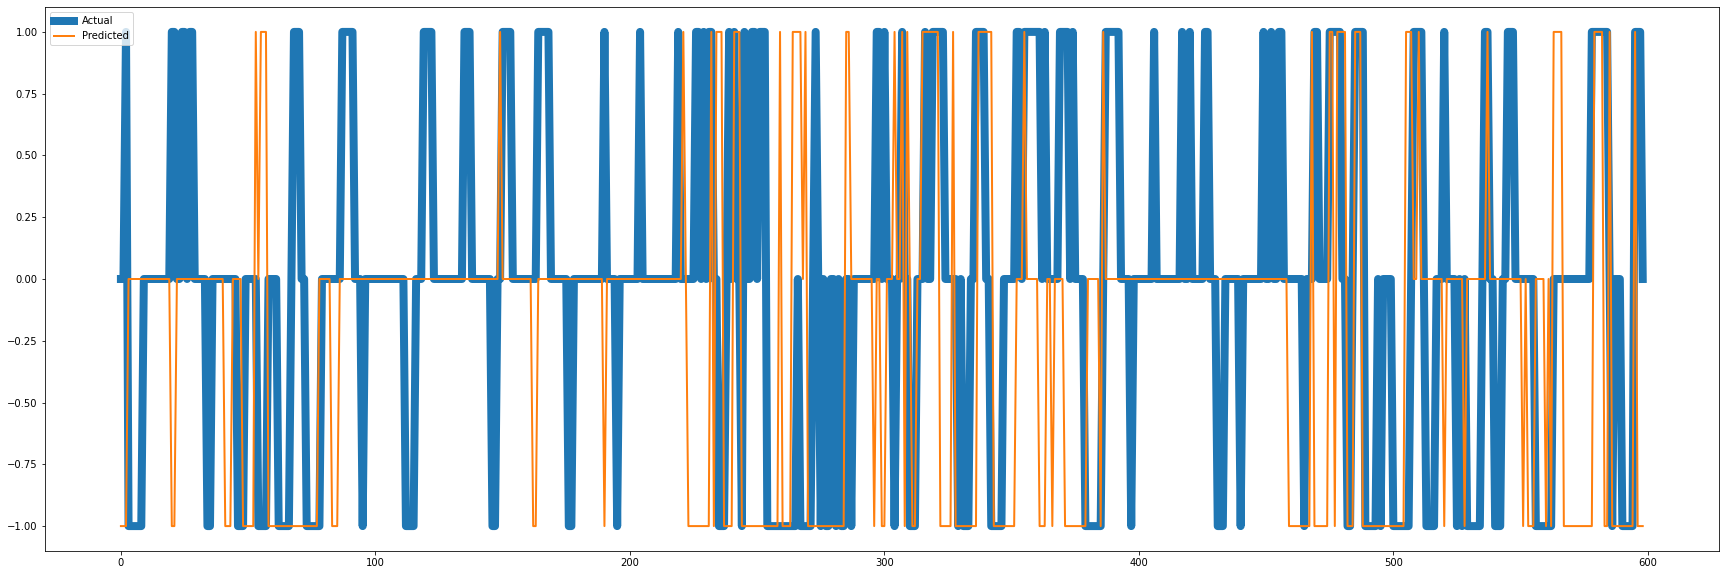

In [17]:
print(Y_Predictions[:35])
print(Y_Actual[:35])
plt.figure(figsize=(30,10))
plt.plot(Y_Actual[1:600],label="Actual",linewidth=8)
plt.plot(Y_Predictions[1:600],label="Predicted",linewidth=2)
plt.legend()

# ACCURACY STATISTICS

In [18]:
count = 0
actualIncreases = 0
predictedIncreases = 0
actualDecreases = 0
predictedDecreases = 0
actualZeroChange = 0
predictedZeroChange = 0
IncOVRDec = 0
DecOVRInc = 0
IncreaseORZero = 0
DecreaseORZero = 0
ZeroOVRInc = 0
ZeroOVRDec = 0
totalPred = len(Y_Predictions)

for i in range(totalPred):
  Yact = Y_Actual[i]
  Yprd = Y_Predictions[i]

  if Yact == Yprd:
    count+=1

  if Yact == 1:
    actualIncreases+=1
  if (Yact == 1) & (Yprd== 1):
    predictedIncreases+=1
  if Yact == -1:
    actualDecreases+=1
  if (Yact == -1) & (Yprd== -1):
    predictedDecreases+=1
  if Yact == 0:
    actualZeroChange+=1
  if (Yact == 0) & (Yprd== 0):
    predictedZeroChange+=1

  if (Yact == -1) & (Yprd == 1):
    IncOVRDec+=1
  if (Yact == 1) & (Yprd== -1):
    DecOVRInc+=1

  if ((Yact == 1) & (Yprd == 0)) | ((Yact == 1) & (Yprd == 1)):
    IncreaseORZero+=1
  if ((Yact == -1) & (Yprd == 0)) | ((Yact == -1) & (Yprd == -1)):
    DecreaseORZero+=1

  if (Yact == 1) & (Yprd == 0):
    ZeroOVRInc+=1
  if (Yact == -1) & (Yprd == 0):
    ZeroOVRDec+=1

acc = count/len(Y_Predictions)
Dacc = predictedDecreases/actualDecreases
Iacc = predictedIncreases/actualIncreases
Zacc = predictedZeroChange/actualZeroChange
FP = IncOVRDec/actualDecreases
FN = DecOVRInc/actualIncreases
ZoI = IncreaseORZero/(actualIncreases)
ZoD = DecreaseORZero/(actualDecreases)
FZI = ZeroOVRInc/actualIncreases
FZD = ZeroOVRDec/actualDecreases

print("Overal Accuracy: ",acc)
print("Decrease Accuracy: ",Dacc)
print("Increase Accuracy: ", Iacc)
print("Zero Change Accuracy: ", Zacc)
print("False Positives: ", FP)
print("False Negatives: ", FN)
print("Zero or Increase when Increasing: ",ZoI)
print("Zero or Decrease when Decreasing: ",ZoD)
print("False Zero Over Increase: ",FZI)
print("False Zero Over Decreases: ",FZD)

Overal Accuracy:  0.404
Decrease Accuracy:  0.5448079658605974
Increase Accuracy:  0.1917989417989418
Zero Change Accuracy:  0.44386761842959116
False Positives:  0.16073968705547653
False Negatives:  0.4801587301587302
Zero or Increase when Increasing:  0.5198412698412699
Zero or Decrease when Decreasing:  0.8392603129445235
False Zero Over Increase:  0.328042328042328
False Zero Over Decreases:  0.29445234708392604


# ***RANDOM MODEL GENERATOR***



In [26]:

SaveModelDestination = "/content/drive/MyDrive/CryptoLSTM_Models_v2/3_Cat_Model_XRP_no0"
ActivationFunctions = ["tanh","relu","softmax","sigmoid","softsign","exponential"]
LayersCount = [16,32,64,128,256,512,1028]

count = 0
while (count < 10):

  Layer1 = LayersCount[random.randint(0,6)]
  Layer2 = LayersCount[random.randint(0,6)]
  Layer3 = LayersCount[random.randint(0,6)]
  Layer4 = LayersCount[random.randint(0,6)]
  Layer5 = LayersCount[random.randint(0,6)]
  Layer6 = LayersCount[random.randint(0,6)]
  Layer7 = LayersCount[random.randint(0,6)]
  Layer8 = LayersCount[random.randint(0,6)]
  DR1 = random.uniform(0.0,0.4)
  DR2 = random.uniform(0.0,0.4)
  DR3 = random.uniform(0.0,0.4)
  DR4 = random.uniform(0.0,0.4)
  DR5 = random.uniform(0.0,0.4)
  DR6 = random.uniform(0.0,0.4)
  DR6 = random.uniform(0.0,0.4)
  DR7 = random.uniform(0.0,0.4)
  AF1 = ActivationFunctions[random.randint(0,5)]
  AF2 = ActivationFunctions[random.randint(0,5)]
  AF3 = ActivationFunctions[random.randint(0,5)]
  AF4 = ActivationFunctions[random.randint(0,5)]
  AF5 = ActivationFunctions[random.randint(0,5)]
  AF6 = ActivationFunctions[random.randint(0,5)]
  AF7 = ActivationFunctions[random.randint(1,5)]
  AF8 = ActivationFunctions[random.randint(0,5)]
  AF9 = ActivationFunctions[random.randint(0,5)]

  LearningRate = random.uniform(0.0001,0.01)

  R = random.randint(0,1)
  if R == 0:
    Optimizer = tf.keras.optimizers.SGD(learning_rate=LearningRate)
  else:
    Optimizer = tf.keras.optimizers.SGD(learning_rate=LearningRate)

  Q = random.randint(0,2)
  Z = random.randint(0,3)
  Epochs = random.randint(4,18)
  BatchSize = LayersCount[random.randint(0,2)]

  topLayer = random.randint(0,2)
  topLayer1 = random.randint(0,3)
  print("")
  print("MODEL NUMBER ", count," :")
  if topLayer == 0:
    print("Dense ", Layer7," ", AF8, "dropout: ", DR7)
  if (Q == 0) | (Q == 1):
    print("LSTM ", Layer1," ","tanh"," dropout: ", DR1)
  if topLayer1 == 0:
    print("Dense ", Layer8," ", AF9, "dropout: ", DR7)
  if (Q == 1):
    print("LSTM ", Layer2," ","tanh"," dropout: ", DR2)
  print("LSTM ", Layer3," ","tanh"," dropout: ", DR3)
  if (Z == 0) | (Z == 1) | (Z == 2):
    print("DENSE ", Layer4," ",AF4," dropout: ", DR4)
  if (Z == 1) | (Z == 2):
    print("DENSE ", Layer5," ",AF5," dropout: ", DR5)
  if (Z == 2):
    print("DENSE ", Layer6," ",AF6," dropout: ", DR6)
  print("DENSE ", "4"," ","Softmax")
  print("Optimizer: ",Optimizer," Learning Rate: ",LearningRate, " Batch Size: ", BatchSize, "Epochs: ",Epochs)
  print("")

  initializer = tf.keras.initializers.GlorotNormal()

  model = keras.Sequential()

  if topLayer == 0:
    model.add(layers.Dense(Layer7,activation=AF8,kernel_initializer=initializer,name="top"))
    model.add(layers.Dropout(rate=DR7))
  if (Q == 0) | (Q == 1):
    model.add(layers.LSTM(Layer1,activation="tanh",return_sequences=True,kernel_initializer=initializer,name="layer1"))
    model.add(layers.Dropout(rate=DR1))
    model.add(layers.BatchNormalization())
  if topLayer1 == 0:
    model.add(layers.Dense(Layer8,activation=AF9,kernel_initializer=initializer,name="top2"))
    model.add(layers.Dropout(rate=DR7))
  if Q == 1:
    model.add(layers.LSTM(Layer2,activation="tanh",return_sequences=True,kernel_initializer=initializer,name="layer2"))
    model.add(layers.Dropout(rate=DR2))
    model.add(layers.BatchNormalization())

  model.add(layers.LSTM(Layer3,activation="tanh",return_sequences=False,kernel_initializer=initializer,name="layer3"))
  model.add(layers.Dropout(rate=DR3))
  model.add(layers.BatchNormalization())

  if (Z == 0) | (Z == 1) | (Z == 2):
    model.add(layers.Dense(Layer4,activation=AF4,kernel_initializer=initializer,name="layer4"))
    model.add(layers.Dropout(rate=DR4))
  if (Z == 1) | (Z == 2):
    model.add(layers.Dense(Layer5,activation=AF5,kernel_initializer=initializer,name="layer5"))
    model.add(layers.Dropout(rate=DR5))
  if (Z == 2):
    model.add(layers.Dense(Layer6,activation=AF6,kernel_initializer=initializer,name="layer6"))
    model.add(layers.Dropout(rate=DR6))

  model.add(layers.Dense(4,activation="softmax",kernel_initializer=initializer,name="OUTPUT"))


  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=Optimizer,metrics=['accuracy'])
  model.fit(X_Train_Sequenced_Data,Y_Categorical_Train,batch_size=BatchSize,epochs=Epochs,validation_split=0.2)
  FilePath = SaveModelDestination+ str(count)+".h5"
  model.save(FilePath)
  model.summary()
  count+=1


MODEL NUMBER  0  :
LSTM  64   tanh  dropout:  0.3009840907607295
DENSE  256   exponential  dropout:  0.034044124373330265
DENSE  128   tanh  dropout:  0.2564058424840252
DENSE  16   softmax  dropout:  0.2641977143250399
DENSE  4   Softmax
Optimizer:  <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fad216b7390>  Learning Rate:  0.0069927616601506174  Batch Size:  32 Epochs:  8

Epoch 1/8
1624/1624 [==============================] - 14s 7ms/step - loss: 1.2401 - accuracy: 0.3695 - val_loss: 1.2763 - val_accuracy: 1.5400e-04
Epoch 2/8
1624/1624 [==============================] - 11s 7ms/step - loss: 1.1193 - accuracy: 0.4139 - val_loss: 1.2501 - val_accuracy: 0.0019
Epoch 3/8
1624/1624 [==============================] - 11s 7ms/step - loss: 1.1021 - accuracy: 0.4220 - val_loss: 1.2422 - val_accuracy: 0.0193
Epoch 4/8
1624/1624 [==============================] - 11s 7ms/step - loss: 1.0934 - accuracy: 0.4286 - val_loss: 1.2334 - val_accuracy: 0.0291
Epoch 5/8
1624/